# Notebook to calculate the photon spectra in IAXO for the Primakoff and LPlasmon fluxes

In [3]:
import sys
sys.path.append('../src')
from Params import *
from PlotFuncs import *
from Like import *
from AxionFuncs import *
import matplotlib.patheffects as pe
path_effects=[pe.Stroke(linewidth=7, foreground='k'), pe.Normal()]

# First we just look at the LPlasmon flux from RZ by taking E_res = 10e-3 and take a range of interesting masses

m_a =  0.001 Number of LPlasmon events =  24783.86446893381
m_a =  0.002 Number of LPlasmon events =  19011.863561040605
m_a =  0.003 Number of LPlasmon events =  7382.401341175646
m_a =  0.004 Number of LPlasmon events =  1248.7896789739898
m_a =  0.005 Number of LPlasmon events =  506.2437878559722
m_a =  0.006 Number of LPlasmon events =  303.5823162651359


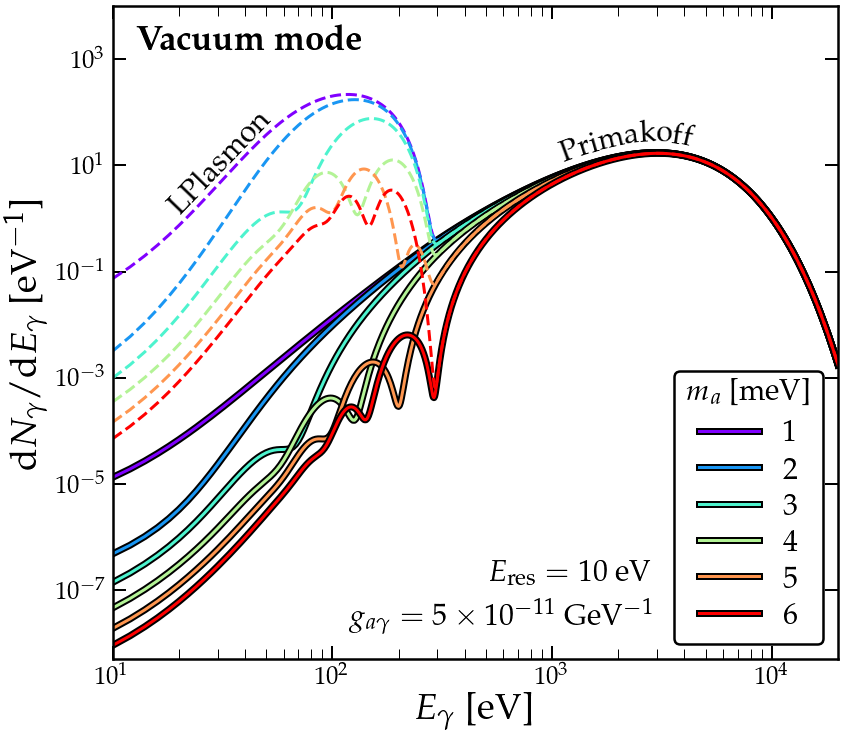

In [17]:
fig,ax = MySquarePlot(r"$E_\gamma$ [eV]",r" ${\rm d}N_\gamma/{\rm d}E_\gamma$ [eV$^{-1}$]",lfs=37)

# Masses we are interested
m_a_vals = [1e-3,2e-3,3e-3,4e-3,5e-3,6e-3]
cols = cm.rainbow(linspace(0,1,size(m_a_vals)))


# Initialise binning:
E_res = 10e-3
E_max = 20.0
nfine = 10
nE_bins = 1000
Ei,E_bins = EnergyBins(E_res,E_max,nfine,nE_bins)


# Fluxes for g = 1e-10
Flux10_0 = AxionFlux_Primakoff_PlasmonCorrection(1e-10,Ei)
Flux10_1 = AxionFlux_Lplasmon(1e-10,Ei,B_model_seismic())
    
# Loop over masses of interest and plot each signal
for m_a,col in zip(m_a_vals,cols):
    dN0 = PhotonNumber_gag(Ei,Flux10_0,m_a,g=5e-11,Eres=Ei[0])
    plt.plot(Ei*1000,dN0/1000,'-',label=str(int(m_a*1000)),lw=3,color=col,path_effects=path_effects)
    
    dN = PhotonNumber_gag(Ei,Flux10_0+Flux10_1,m_a,g=5e-11,Eres=Ei[0])
    plt.plot(Ei*1000,dN/1000,'--',lw=3,color=col)
    print('m_a = ',m_a,'Number of LPlasmon events = ',trapz(dN,Ei)-trapz(dN0,Ei))

    
# Tweaking:
plt.xlim(left=Ei[0]*1000)
plt.xlim(right=Ei[-1]*1000)
plt.ylim(bottom=5e-9,top=1e4)
plt.xscale('log')
plt.yscale('log')
leg = plt.legend(fontsize=30,frameon=True,title=r'$m_a$ [meV]',loc="lower right",framealpha=1,edgecolor='k',labelspacing=0.2)
plt.setp(leg.get_title(),fontsize=30)
leg.get_frame().set_linewidth(2.5)
plt.gcf().text(0.7,0.21,r'$E_{\rm res} = 10$ eV',horizontalalignment='right',fontsize=30)
plt.gcf().text(0.7,0.16,r'$g_{a\gamma} = 5\times10^{-11}$ GeV$^{-1}$',horizontalalignment='right',fontsize=30)
dN1_ref = PhotonNumber_gag(Ei,Flux10_0,1e-6,g=5e-11,Eres=Ei[0])
xtxt = Ei[500:3000]*1000
ytxt = 1.18*dN1_ref[500:3000]/1000
txt = CurvedText(xtxt,ytxt,text=r'Primakoff',va = 'bottom',axes = ax,fontsize=30)
plt.gcf().text(0.18,0.64,r'LPlasmon',fontsize=30,rotation=46)
plt.gcf().text(0.15,0.83,r'{\bf Vacuum mode}',fontsize=35)

# Save figure
MySaveFig(fig,'XraySpectrum_lowmasses')

# Now do a similar thing for the buffer gas phase but change the pressure values

m_a =  0.1 pressure_offset =  1e-100 Number of LPlasmon events =  0.0017295782311865793
m_a =  0.1 pressure_offset =  0.1 Number of LPlasmon events =  0.0010267363345910496
m_a =  0.1 pressure_offset =  0.2 Number of LPlasmon events =  0.001295534874845572
m_a =  0.1 pressure_offset =  0.5 Number of LPlasmon events =  0.003171707501060439
m_a =  0.1 pressure_offset =  0.9090909090909091 Number of LPlasmon events =  0.03418154382575267
m_a =  0.1 pressure_offset =  0.9999999000000099 Number of LPlasmon events =  0.06042514048749581


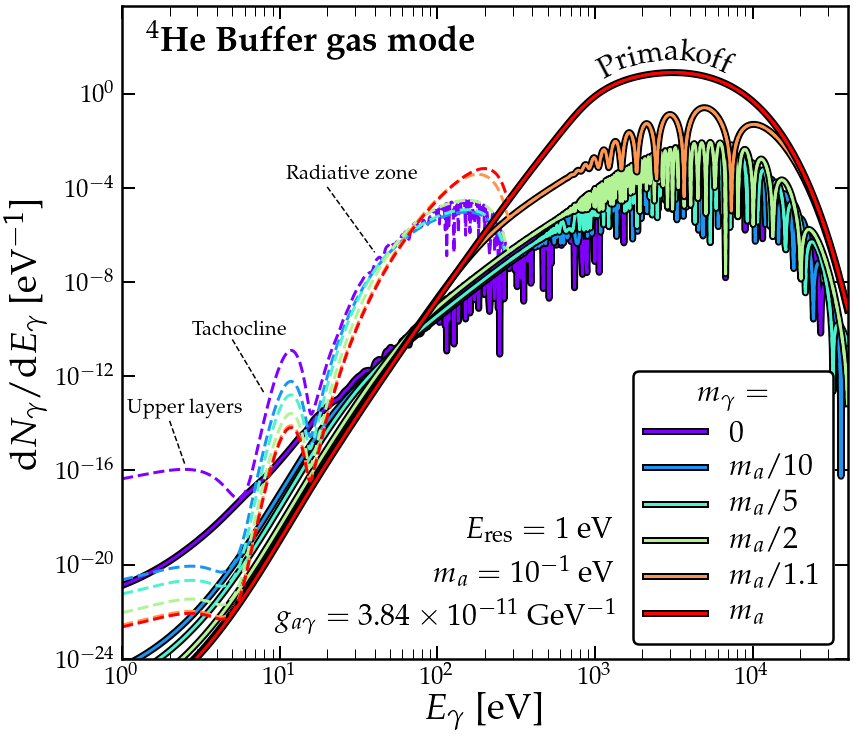

In [22]:
m_a = 1.0e-1
pos = 1/array([1e100,10,5,2,1.1,1.0000001]) # Pressure offsets from p_max
T_operating = 1.8
labs = array(['1000','10','5','2','1.1','1'])

# KSVZ axion
g = 2e-10*m_a*1.92


fig,ax = MySquarePlot(r"$E_\gamma$ [eV]",r" ${\rm d}N_\gamma/{\rm d}E_\gamma$ [eV$^{-1}$]",lfs=37)

cols = cm.rainbow(linspace(0,1,size(pos)))


# Finer binning that before:
E_res = 1e-3
E_max = 40.0
nfine = 10
nE_bins = 1000
Ei = logspace(log10(E_res),log10(E_max),1000)

# Fluxes again:
Flux10_0 = AxionFlux_Primakoff_PlasmonCorrection(1e-10,Ei)
Flux10_1 = AxionFlux_Lplasmon(1e-10,Ei,B_model_seismic())

dN1_0 = PhotonNumber_gag_BufferGas(Ei,Flux10_0,m_a,0.99999999*(m_a)**2.0*T_operating/0.02,g=g,Eres=Ei[0])
dN2_0 = PhotonNumber_gag_BufferGas(Ei,Flux10_0+Flux10_1,m_a,0.999999*(m_a)**2.0*T_operating/0.02,g=5e-11,Eres=Ei[0])

    
for po,col,label in zip(pos,cols,labs):
    pressure = po*(m_a)**2.0*T_operating/0.02
    lab = r'$m_a/$'+label
    if po<1e-10:
        lab = '0'
    if lab==r'$m_a/$1':
        lab = r'$m_a$'
    dN0 = PhotonNumber_gag_BufferGas(Ei,Flux10_0,m_a,pressure,g=g,Eres=Ei[0])
    plt.plot(Ei*1000,dN0/1000,'-',label=lab,lw=3,color=col,path_effects=path_effects)
    
    dN = PhotonNumber_gag_BufferGas(Ei,Flux10_0+Flux10_1,m_a,pressure,g=g,Eres=Ei[0])
    plt.plot(Ei*1000,dN/1000,'--',lw=3,color=col)
    
    print('m_a = ',m_a,'pressure_offset = ',po,'Number of LPlasmon events = ',trapz(dN,Ei)-trapz(dN0,Ei))

plt.xlim(left=Ei[0]*1000)
plt.xlim(right=Ei[-1]*1000)
plt.ylim(bottom=1e-24,top=5e3)
plt.xscale('log')
plt.yscale('log')
leg = plt.legend(fontsize=30,frameon=True,title=r'$m_\gamma = $',loc="lower right",framealpha=1,edgecolor='k',labelspacing=0.2)
plt.setp(leg.get_title(),fontsize=30)
leg.get_frame().set_linewidth(2.5)

plt.gcf().text(0.65,0.26,r'$E_{\rm res} = 1$ eV',horizontalalignment='right',fontsize=30)
plt.gcf().text(0.65,0.21,r'$m_a = 10^{-1}$ eV',horizontalalignment='right',fontsize=30)
plt.gcf().text(0.65,0.16,r'$g_{a\gamma} = 3.84\times10^{-11}$ GeV$^{-1}$',horizontalalignment='right',fontsize=30)

txt = CurvedText(x = Ei[650:]*1000,y = 2*dN1_0[650:]/1000,text=r'Primakoff',va = 'bottom',axes = ax,fontsize=30)

#plt.gcf().text(0.18,0.7,r'LPlasmon',fontsize=30,rotation=46)

fs = 20
plt.gcf().text(0.13,0.41,'Upper layers',fontsize=fs)
plt.gcf().text(0.2,0.50,'Tachocline',fontsize=fs)
plt.gcf().text(0.3,0.68,'Radiative zone',fontsize=fs)
plt.plot([2,2.5],[1.8*0.7e-14,1.8*1e-16],'k--')
plt.plot([5,8],[1.8*0.2e-10,1.8*0.1e-12],'k--')
plt.plot([20,40],[1.8*0.6e-4,1.8*0.1e-6],'k--')


plt.gcf().text(0.15,0.83,r'{\bf $^4$He Buffer gas mode}',fontsize=35)

MySaveFig(fig,'XraySpectrum_BufferGas')
